# Exercise 1

Work on this before the next lecture on 10 April. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/1). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.18), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2017/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2017".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. Instead of using a linear model as in the lecture, use a k-nearest neighbour model.

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

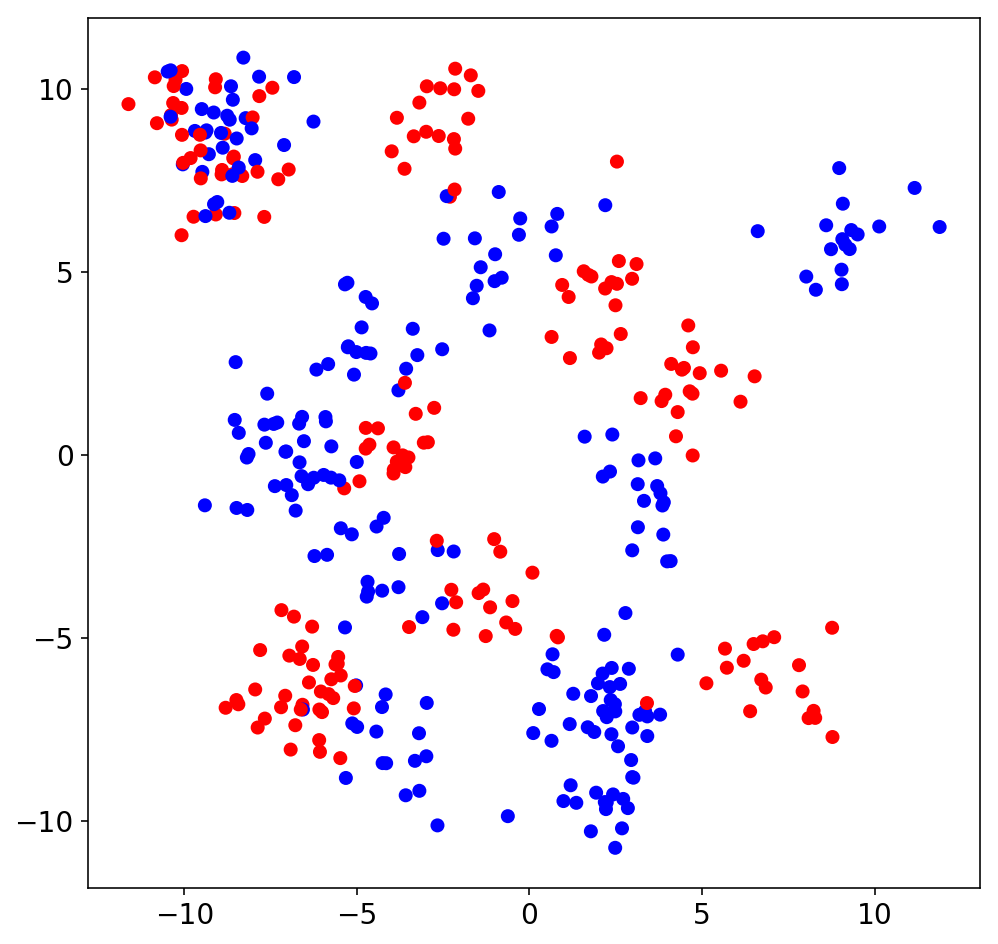

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

I have decided to split my data into training and test datasets of (approximately) equal size (50-50). Ideally I want the training dataset to be as large as possible, but we need to keep enough samples for the testing as well. In the case of our rather small dataset (~17 samples per center), I feel that further shrinking the test dataset might reduce it too much. In a larger dataset however, I would likely push the split to include more samples in the training dataset.

It also depends on the ultimate aim: if we want to use the classifier in a practical setting (for example to predict patients who might be at risk of developing diabetes), we definitely want as many samples as possible in the training phase. We might then want to push the `train_size` variable closer to 1.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
print("Training score:", clf.score(X_train, y_train), "\tTest score:", clf.score(X_test, y_test))

Training score: 0.895 	Test score: 0.895


In [7]:
from sklearn.model_selection import train_test_split

for k in np.arange(.1, 1, .1):
    scores = []
    neighbors = []
    for i in range(10000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=k, random_state=42+2*i)
        clf = KNeighborsClassifier()
        clf.fit(X_train, y_train)
        scores.append([[clf.score(X_train, y_train), clf.score(X_test, y_test)]])
        neighbors.append(clf.n_neighbors)
    scores = np.concatenate(scores, axis=0)
    print("Split:", int(100*k), '-', int(100-100*k), "\tTraining score:", np.median(scores[:,0]),
          "\tTest score:", np.median(scores[:,1]))

Split: 10 - 90 	Training score: 0.775 	Test score: 0.605555555556
Split: 20 - 80 	Training score: 0.8625 	Test score: 0.75
Split: 30 - 70 	Training score: 0.9 	Test score: 0.825
Split: 40 - 60 	Training score: 0.9 	Test score: 0.845833333333
Split: 50 - 50 	Training score: 0.9 	Test score: 0.85
Split: 60 - 40 	Training score: 0.9 	Test score: 0.85
Split: 70 - 30 	Training score: 0.9 	Test score: 0.85
Split: 80 - 20 	Training score: 0.903125 	Test score: 0.85
Split: 90 - 10 	Training score: 0.902777777778 	Test score: 0.85


Both the training and the test score seem mostly stable beyond a split of 40-60. The extreme stability of the test score shows that 50% of our dataset is sufficient to create an accurate model and increasing the number of samples no longer improves prediction. The test score value which stabilizes at 0.85 suggests that the irreducible error of this problem is arond 0.15, which means that the absolute best classifier will fail to predict the outcome in ~15% of cases.

The training score is always higher than the test score, which is to be expected. There is a very slight increase in training score with the 80-20 split which decreases slightly with the 90-10 split. Although it is slight, it reamins with a large number of repetitions (here 10,000) and occurs regardless of random seeds used. I expect this is the result of 2 conflicting mechanisms: the increase is likely due to a slight overfitting of the model

In [56]:
clf.n_neighbors

5

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [13]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

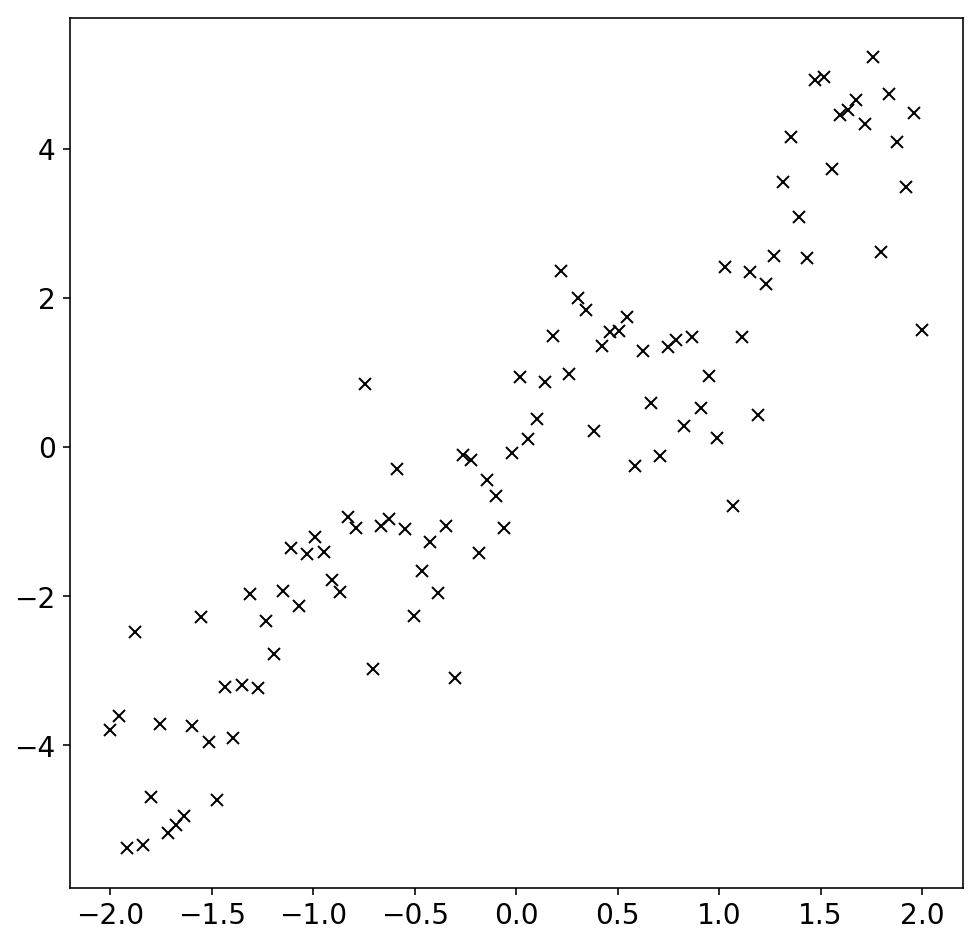

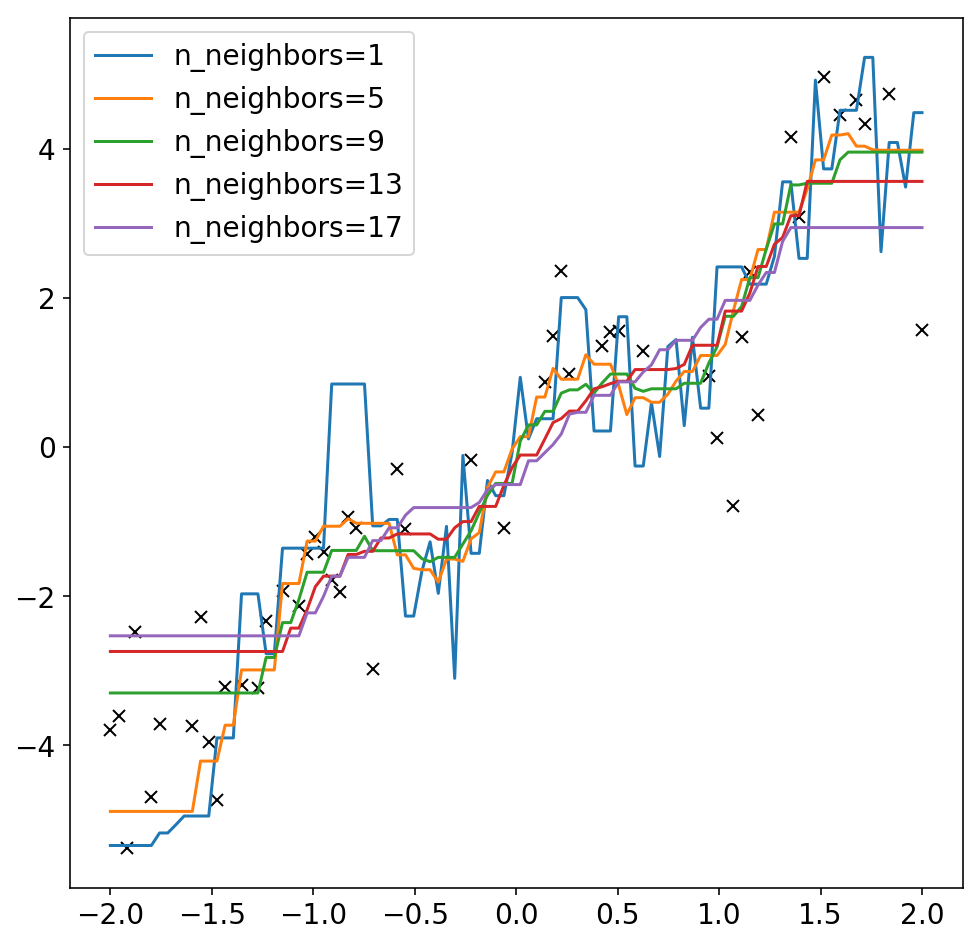

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X, y = make_regression()
plt.plot(X, y, 'xk')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
fig, ax = plt.subplots(1,1)
line = np.linspace(-2, 2, 100).reshape(-1, 1)

ax.plot(X_test, y_test, 'xk')

for n in range(1, 20, 4):
    rgr = KNeighborsRegressor(n_neighbors=n)
    rgr.fit(X_train, y_train)
    ax.plot(line, rgr.predict(line), label='n_neighbors=%i' % n);
    
plt.legend(loc='best');

---

## Question 3

Logistic regression. Use a linear model to solve a two class classification problem.

* What is the difference between a linear regression model and a logistic regression model?
* plot your data and split it into a training and test set
* draw your guess for where the decision boundary will be on the plot. Why did you pick this one?
* use the `LogisticRegression` classifier to fit a model to your training data
* extract the fitted coefficients from the model and draw the fitted decision boundary
* create a function to draw the decision surface (the classifier's prediction for every point in space)
* why is the boundary where it is?
* **(bonus)** create new datasets with increasingly larger amounts of noise (increase the `cluster_std` argument) and plot the decision boundary for each case. What happens and why?
* create 20 new datasets by changing the `random_state` parameter and fit a model to each. Visualise the variation in the fitted parameters and the decision boundaries you obtain. Is this a high or low variance model?

Use `make_two_blobs()` to create a simple dataset and use the `LogisticRegression` classifier to answer the above questions.

In [18]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))

0.976666666667 0.95


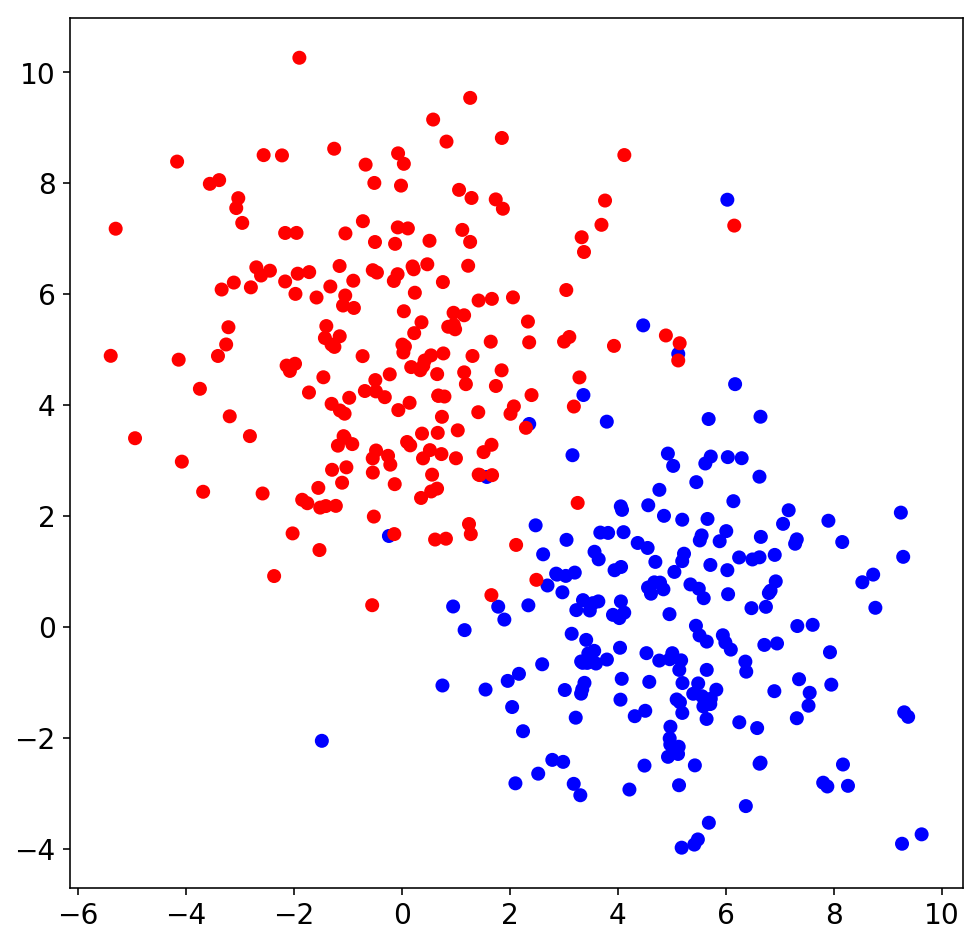

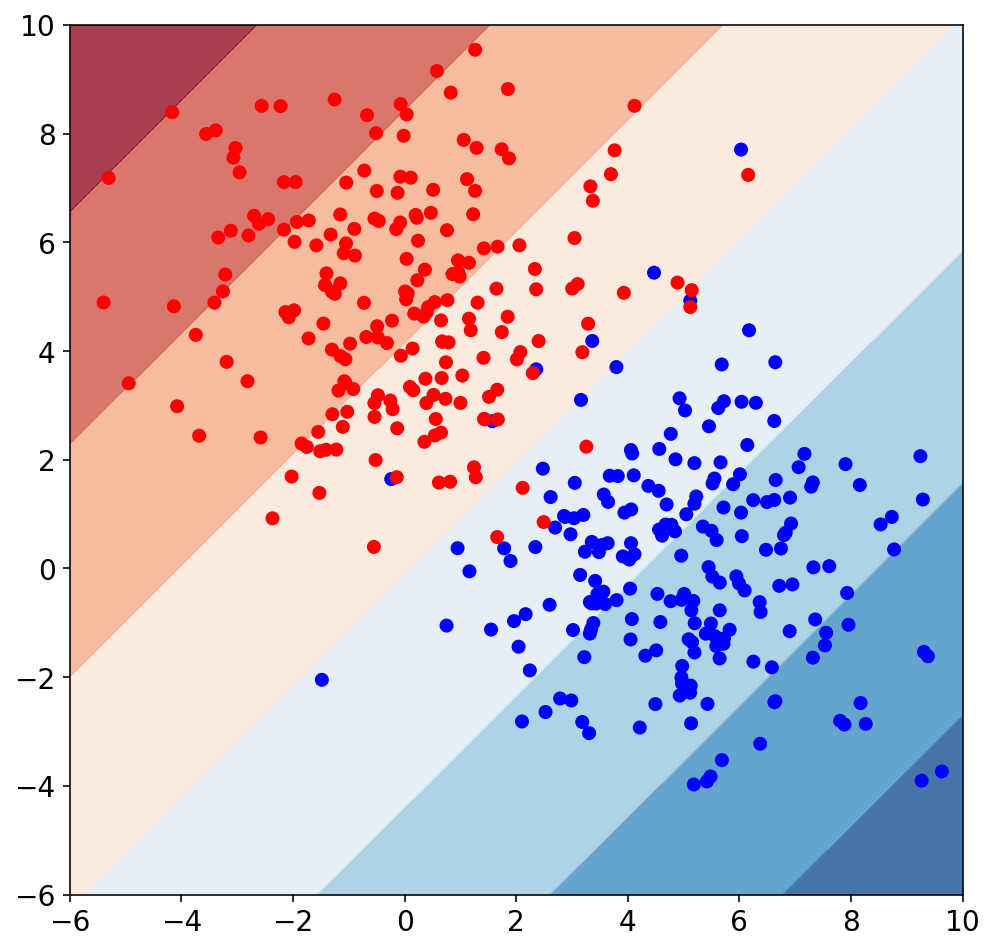

In [24]:
# Your answer
plt.scatter(X[:,0], X[:,1], c=y)
from utils import plot_surface

plot_surface(clf, X, y, xlim=(-6, 10), ylim=(-6, 10))

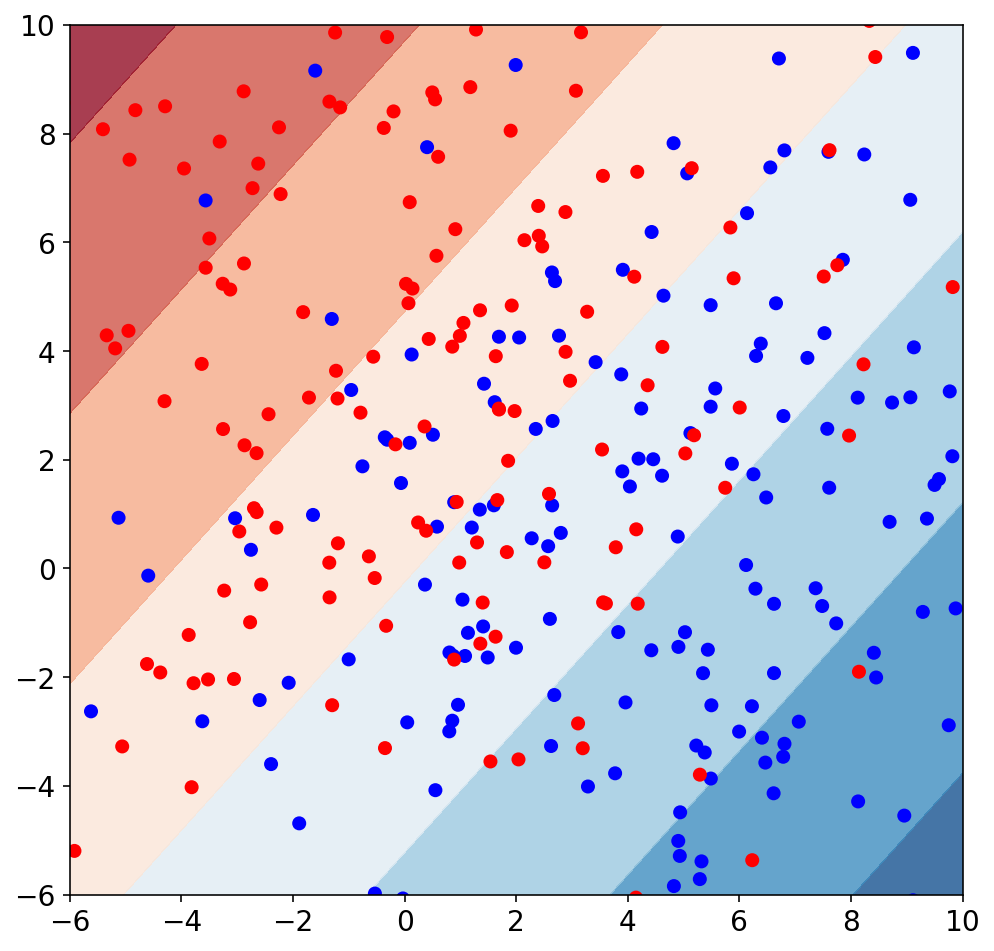

In [25]:
X, y = make_two_blobs(cluster_std=5)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

clf = LogisticRegression()
clf.fit(X, y)
plot_surface(clf, X, y, xlim=(-6, 10), ylim=(-6, 10))

---

## Question 4

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about how you can increase the complexity of a logistic regression model. Visualise the classificatio naccuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

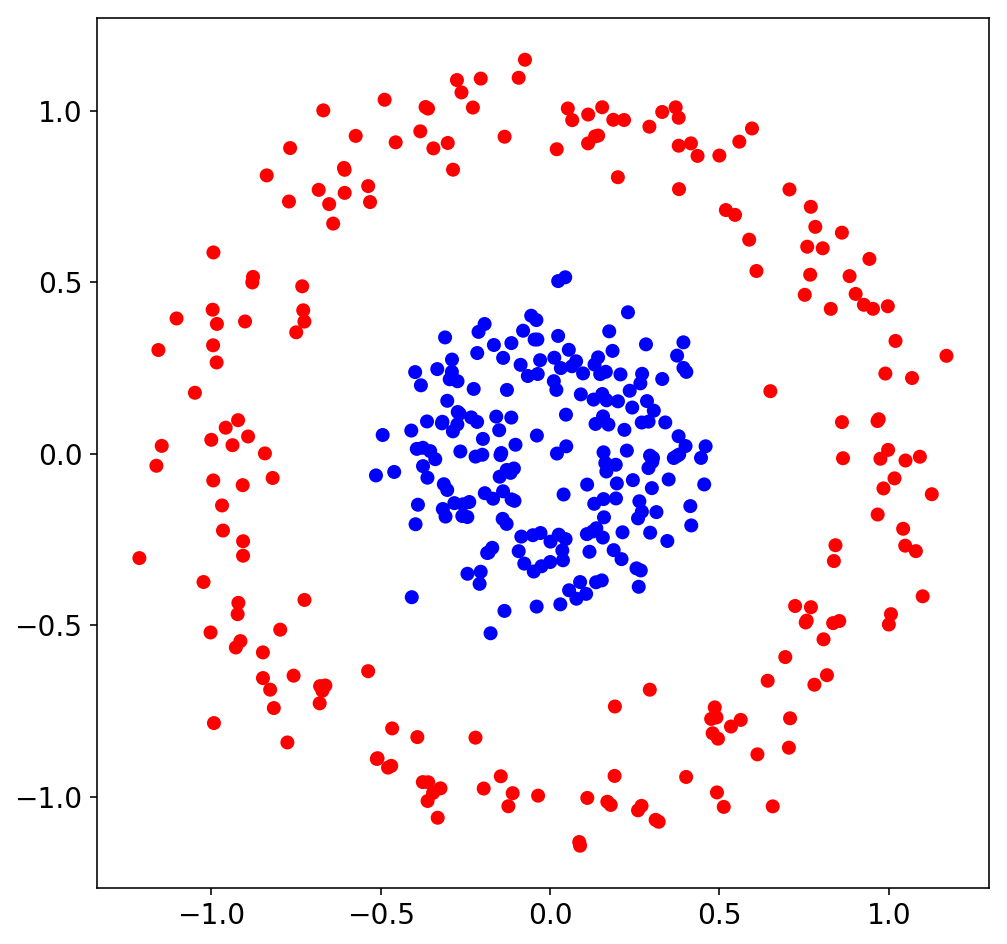

In [26]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

1 0.429166666667
2 0.995833333333
3 0.995833333333
4 0.995833333333


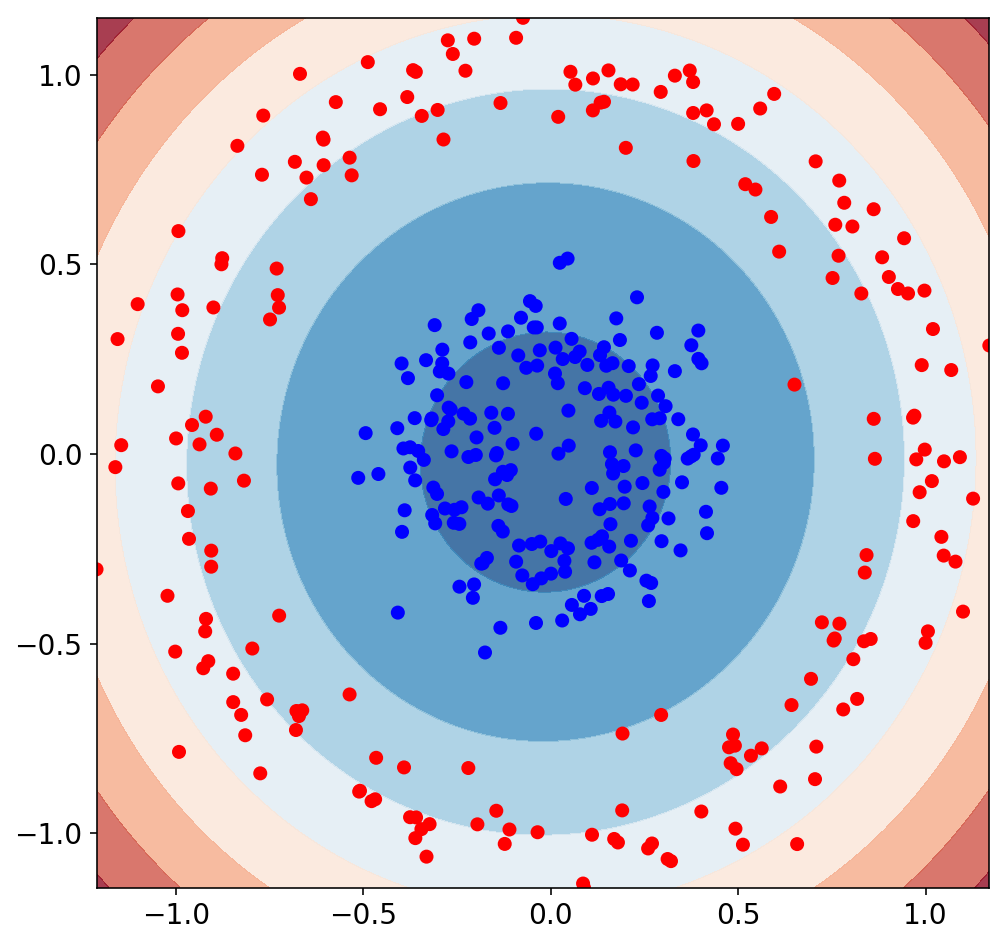

In [29]:
# Your answer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
for p in range(1, 5):
    clf = make_pipeline(PolynomialFeatures(p), LogisticRegression())
    clf.fit(X_train, y_train)
    print(p, clf.score(X_train, y_train))
    
clf = make_pipeline(PolynomialFeatures(2), LogisticRegression())
clf.fit(X_train, y_train)
plot_surface(clf, X, y)